# 1. Chargement et visualisation des données:

In [71]:
import numpy as np
import matplotlib.pyplot as plt
import math

<function matplotlib.pyplot.show(*args, **kw)>

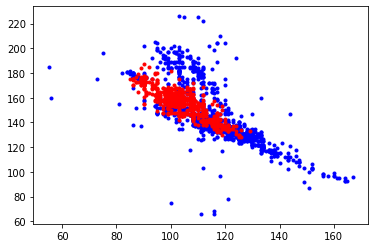

In [72]:
[X_train, y_train, X_test, y_test] = np.load("TP3.npy", allow_pickle=True) 

#Pixel peau
T_train = X_train[np.where(y_train==1),:] 
T_train = np.reshape(T_train,(T_train.shape[1],T_train.shape[2] )) 

#Pixel non peau 
F_train = X_train[np.where(y_train==0),:] 
F_train = np.reshape(F_train,(F_train.shape[1],F_train.shape[2] )) 

plt.plot(F_train[:,0], F_train[:,1], '.b') 
plt.show 
plt.plot(T_train[:,0], T_train[:,1], '.r') 
plt.show

In [73]:
#Nombre de pixel chaire
print("Dimension des pixels chaire: ", T_train.shape)
# Nombre de pixels non chaire
print("Dimension des pixels non chaire: ", F_train.shape)


Dimension des pixels chaire:  (639, 2)
Dimension des pixels non chaire:  (1731, 2)


# 2. Modélisation de la densité de probabilité a priori de la teinte chaire par une loi normale 2D avec des dimensions décorrélées:

### a. Estimation de la densité de probabilité a priori des pixels de teinte chaire

In [74]:
# Fonction pour estimer la densité de probabilités
def norm1(x, m, s):
     p =1/(np.sqrt(2*np.pi)*s)*np.exp(-(x-m)*(x-m)/(2*s*s)) 
     return p


In [75]:
# Determiner les moyennes et ecarts types.
m_cb = np.mean(T_train[:,0])
m_cr = np.mean(T_train[:,1])
std_cb = np.std(T_train[:,0])
std_cr = np.std(T_train[:,1])

Dimension de p1_train:  (2370,)


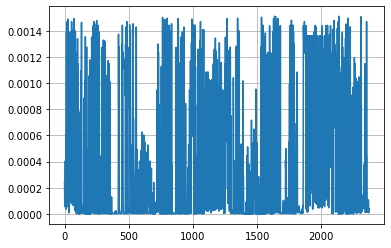

In [76]:
# Calcul des densités de probabilités
p1_train = norm1(X_train[:,0], m_cb, std_cb)*norm1(X_train[:,1], m_cr, std_cr)
print("Dimension de p1_train: ",p1_train.shape)
plt.plot(p1_train)
plt.grid()

### b. Classification

Dimension de p1_train:  (284,)


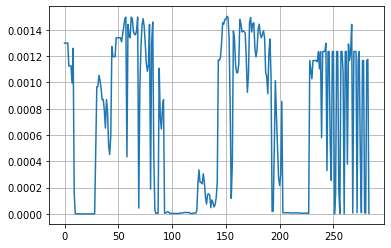

In [77]:
# Calcul des densités de probabilités sur la base de test
p1_test = norm1(X_test[:,0],m_cb, std_cb)*norm1(X_test[:,1],m_cr, std_cr)
print("Dimension de p1_train: ",p1_test.shape)
plt.plot(p1_test)
plt.grid()

In [78]:
TP = 0
TN = 0
FP = 0
FN = 0
# Classification
for i in range (len(p1_test)):
    if p1_test[i] >= np.mean(p1_train):
        if y_test[i] == 1:
            TP+=1
        else:
            FP +=1
    else:
        if y_test[i] == 0:
            TN+=1
        else:
            FN +=1
print("Nombre de vrai positif: TP = ",TP)
print("Nombre de faux positif: FP = ",FP)
print("Nombre de vrai negatif: TN = ",TN)
print("Nombre de vrai positif: FN = ",FN)
sensibilite = TP/(TP+FN)
specificite = TN/(FP+TN)
print('Sensibilite = ', sensibilite)
print('specificite = ', specificite)

Nombre de vrai positif: TP =  102
Nombre de faux positif: FP =  60
Nombre de vrai negatif: TN =  120
Nombre de vrai positif: FN =  2
Sensibilite =  0.9807692307692307
specificite =  0.6666666666666666


### c. Courbe ROC

In [79]:
NB = 20 
step = (np.max(p1_train) - np.min(p1_train) )/ NB
SEUILS = np.arange (np.min(p1_train), np.max(p1_train), step)
sensitivity = []
specificity = []
for seuil in SEUILS:
    TP = 0
    TN = 0
    FP = 0
    FN = 0
    for i in range (len(p1_test)):
        if p1_test[i] >= seuil:
            if y_test[i] == 1:
                TP+=1
            else:
                FP +=1
        else:
            if y_test[i] == 0:
                TN+=1
            else:
                FN +=1
    #print("Nombre de vrai positif: TP = ",TP)
    #print("Nombre de faux positif: FP = ",FP)
    #print("Nombre de vrai negatif: TN = ",TN)
    #print("Nombre de vrai positif: FN = ",FN)
    sensibilite = TP/(TP+FN)
    sensitivity.append(sensibilite)
    specificite = TN/(FP+TN)
    specificity.append(1-specificite)

    #print('Sensibilite = ', sensibilite)
    #print('specificite = ', specificite)


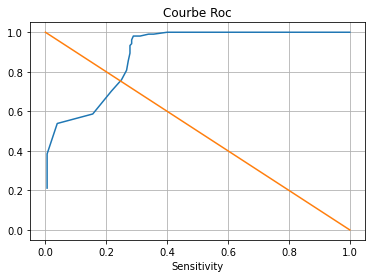

In [80]:
#Courbe Roc
plt.plot(specificity, sensitivity)
plt.grid()
plt.title("Courbe Roc")
plt.xlabel("1 - specificity")
plt.xlabel("Sensitivity")
plt.plot([0,1],[1,0])

# 3. Modélisation de la densité de probabilité a priori de la teinte chaire par une loi normale 2D:

In [81]:
def norm2(x, m, cov): 
    a = np.dot(np.transpose((x-m)), np.linalg.inv(cov)) 
    a = np.dot(a, (x-m)) 
    p =1/(np.sqrt(2*np.pi*np.linalg.det(cov)))*np.exp(-0.5*a) 
    return p

In [82]:
moy = [m_cb, m_cr]
cov = np.cov(np.transpose(T_train))
p2_train = np.zeros(X_train.shape[0])
p2_test = np.zeros(X_test.shape[0])
for i in range(len(X_train)):
    p2_train[i] = norm2(X_train[i], moy, cov)
for j in range(len(X_test)):
    p2_test[j] = norm2(X_test[j], moy, cov)



In [83]:
# Courbe ROC
NB = 20 
step = (np.max(p2_train) - np.min(p2_train) )/ NB
SEUILS = np.arange (np.min(p2_train), np.max(p2_train), step)
sensitivity2 = []
specificity2 = []
for seuil in SEUILS:
    TP = 0
    TN = 0
    FP = 0
    FN = 0
    for i in range (len(p2_test)):
        if p2_test[i] >= seuil:
            if y_test[i] == 1:
                TP+=1
            else:
                FP +=1
        else:
            if y_test[i] == 0:
                TN+=1
            else:
                FN +=1
    #print("Nombre de vrai positif: TP = ",TP)
    #print("Nombre de faux positif: FP = ",FP)
    #print("Nombre de vrai negatif: TN = ",TN)
    #print("Nombre de vrai positif: FN = ",FN)
    sensibilite = TP/(TP+FN)
    sensitivity2.append(sensibilite)
    specificite = TN/(FP+TN)
    specificity2.append(1-specificite)

    #print('Sensibilite = ', sensibilite)
    #print('specificite = ', specificite)


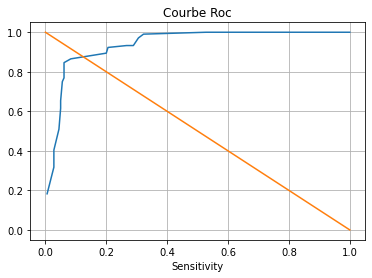

In [84]:
plt.plot(specificity2, sensitivity2)
plt.grid()
plt.title("Courbe Roc")
plt.xlabel("1 - specificity")
plt.xlabel("Sensitivity")
plt.plot([0,1],[1,0])


### Comparaison des coubes Roc:

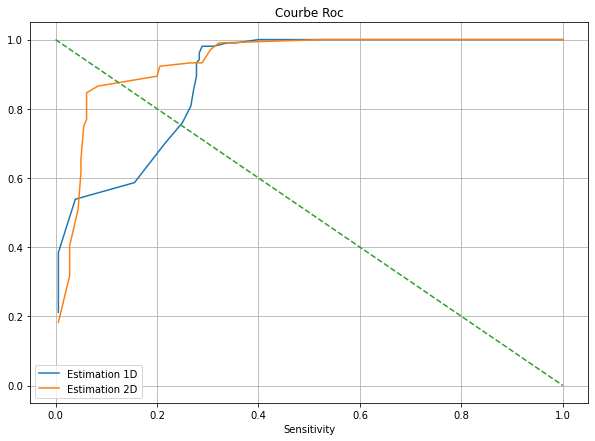

In [93]:
plt.figure(figsize=(10,7))
plt.plot(specificity, sensitivity, label = "Estimation 1D")
plt.plot(specificity2, sensitivity2, label = "Estimation 2D")
plt.grid()
plt.title("Courbe Roc")
plt.xlabel("1 - specificity")
plt.xlabel("Sensitivity")
plt.legend()
plt.plot([0,1],[1,0], "--")